In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Challenge Overview:
SuperLender is a local digital lending company, which prides itself in its effective use of credit risk models to deliver profitable and high-impact loan alternative. Its assessment approach is based on two main risk drivers of loan default prediction:. 1) willingness to pay and 2) ability to pay. Since not all customers pay back, the company invests in experienced data scientist to build robust models to effectively predict the odds of repayment.

These two fundamental drivers need to be determined at the point of each application to allow the credit grantor to make a calculated decision based on repayment odds, which in turn determines if an applicant should get a loan, and if so - what the size, price and tenure of the offer will be.

There are two types of risk models in general: New business risk, which would be used to assess the risk of application(s) associated with the first loan that he/she applies. The second is a repeat or behaviour risk model, in which case the customer has been a client and applies for a repeat loan. In the latter case - we will have additional performance on how he/she repaid their prior loans, which we can incorporate into our risk model.

It is your job to predict if a loan was good or bad, i.e. accurately predict binary outcome variable, where Good is 1 and Bad is 0.

# Introduction

In this challenge we aim to determine whether or not a person will default or not using Customer Performance data,  Customer Demographics and Previous Loans data. As such this is a classification problem and we will be using classification techniques to gain useful insights and make predictions on our dataset.

Our dataset contains structure and label data which contains both numerical and categorical data. Also because our data is labeled we will use Supervised Machine Learning Algorithms for our preditions.

## Aim

* To make recommendations based on analysis
* Create interesting data visualisations to demonstrate useful insights.
* Make predictions on data to determine whether or not a customer will default on a loan

### Importing Datasets

#### The train perfromance dataset

In [2]:
train_perf_df = pd.read_csv('data/trainperf.csv')
train_perf_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [3]:
train_perf_df.shape

(4368, 10)


### Summary Statistics

In this section we will explore the data types and the summary statistics of our variables.

Let's start by looking at the data types and number of entries of each column.


In [4]:
train_perf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


#### We can see that there are alot of null values on the referredby column so we are going to drop it

In [5]:
train_perf_df = train_perf_df.drop('referredby',axis = 1)
train_perf_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good


In [6]:
train_perf_df.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays
count,4.368000e+03,4368.000000,4368.000000,4368.000000,4368.000000
mean,3.019810e+08,5.172390,17809.065934,21257.377679,29.261676
std,1.343115e+04,3.653569,10749.694571,11943.510416,11.512519
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000


* Due to the nature of some of the features we will need to standardise the values for better predictions

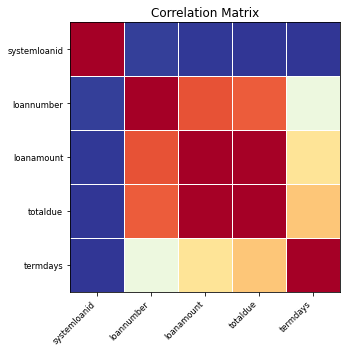

In [7]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(5,5));
ax = fig.add_subplot(111);
plot_corr(train_perf_df.corr(), xnames = train_perf_df.corr().columns, ax = ax);

* From the above correlation matrix we see that there is a perfect correlation between loanamount and total due, which makes sense since amounts only differ by the percentage of the loan interest rate. Therefore we will drop on of them.
* There is also a high correlation between the loan number and the loan amount & amount due. Assuming that the loan number refers to the number of loans taken by a customer, then the higher the loan number, the higher the loan amount & amount due.
* Since there is a higher correlation between the term days and the amount due compared to term days and loan amount, that implies that the more term days you have for the loan, the higher the amount due because of interest rates.
* Finally, the term days and total due would make a fairly good predictor for whether or not a person will default or not on a loan while avoiding multicolinearity.

#### The Demographics Dataset

In [8]:
train_demograph_df = pd.read_csv('data/traindemographics.csv')
train_demograph_df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [9]:
train_demograph_df.shape

(4346, 9)

In [10]:
train_demograph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


## Data Cleaning

#### In this section will be cleaning our data imputing missing values or removing columns with an extremely high number if missing values

The number of missing values  on the bank_branch_clients and employment_status_clients is very high as a result they provide very little information in describing the demographics of customers. We therefore will remove them from our data

In [11]:
demo_df = train_demograph_df.drop(['bank_branch_clients','level_of_education_clients'],1)
demo_df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,Permanent
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,Permanent


#### Extract Year from birthdate since the specific date of birth is not significant to our demographics analysis


In [12]:
demo_df.birthdate = demo_df.birthdate.apply(lambda x: int(x.split(' ')[0].split('-')[0]))
demo_df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients
0,8a858e135cb22031015cbafc76964ebd,1973,Savings,3.319219,6.528604,GT Bank,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986,Savings,3.325598,7.119403,Sterling Bank,Permanent
2,8a858e5b5bd99460015bdc95cd485634,1987,Savings,5.746100,5.563174,Fidelity Bank,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991,Savings,3.362850,6.642485,GT Bank,Permanent
4,8a858e785acd3412015acd48f4920d04,1982,Savings,8.455332,11.971410,GT Bank,Permanent


#### We will encode categorical values with numberical ones on bank_account_type

In [13]:
demo_df.bank_account_type.value_counts()

Savings    3425
Other       865
Current      56
Name: bank_account_type, dtype: int64

# Exploratory Data Analysis

## Data Visualisations of Customer Demographics

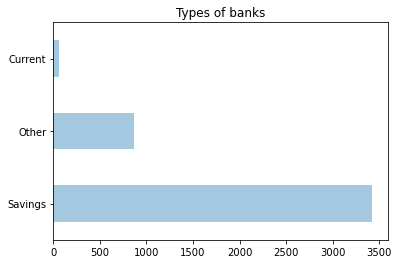

In [14]:
demo_df.bank_account_type.value_counts().plot(kind='barh', title='Types of banks', alpha=0.4)
plt.show()

* This plot shows the number of customers per bank account type
* From the above plot we can see majority of the customers use a Savings Account Type.
* The least number of customers use the Current Account Type.

#### How many people have a savings account and are permanent?

In [46]:
use_savings_permanent = demo_df[(demo_df.bank_account_type == 'Savings') & (demo_df.employment_status_clients == 'Permanent')].customerid.unique()
'The number of permanently employed people with a savings account is ' + str(len(use_savings_permanent))

'The number of permanently employed people with a savings account is 2531'

In [47]:
use_savings_self_employed = demo_df[(demo_df.bank_account_type == 'Savings') & (demo_df.employment_status_clients == 'Self-Employed')].customerid.unique()
'The number of self employed people with a savings account is ' + str(len(use_savings_self_employed))

'The number of self employed people with a savings account is 115'

In [50]:
# Percentage of people that have a savings account and are permanent
percent_employed_saving = (len(use_savings_permanent) / demo_df.shape[0]) * 100
# Percentage of people that have a savings account and are self-employed
percent_self_employed_saving = (len(use_savings_self_employed) / demo_df.shape[0]) * 100

print('Permanently employed with Savings Account ' + str(round(percent_employed_saving, 2)) + '%')
print('Self employed with Savings Account ' + str(round(percent_self_employed_saving, 2)) + '%')

Permanently employed with Savings Account 58.24%
Self employed with Savings Account 2.65%


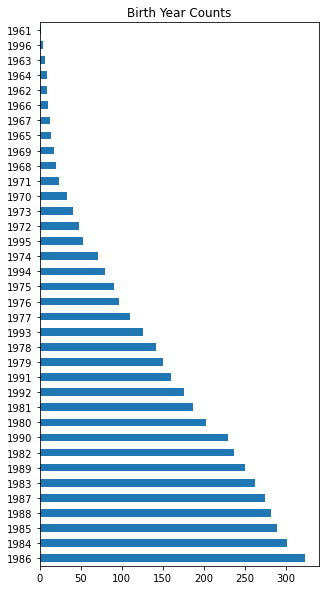

In [15]:
demo_df.birthdate.value_counts().plot(kind='barh', title='Birth Year Counts', figsize=(5,10), orientation='horizontal')
plt.show()

In [16]:
demo_df.birthdate.describe()

count    4346.000000
mean     1984.053382
std         6.135591
min      1961.000000
25%      1980.000000
50%      1985.000000
75%      1988.000000
max      1996.000000
Name: birthdate, dtype: float64

#### The Plot shows the number of customers per birthdate year
* The average birth year for customers is between 1984 and 1985
* Most of the customers we born between 1980 and 1988
* The highest number of customers were born in 1986
* The lowest number customers were born before 1970

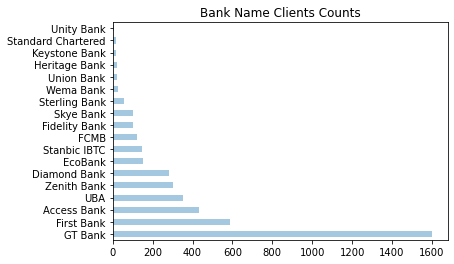

In [17]:
demo_df.bank_name_clients.value_counts().plot(kind='barh', title='Bank Name Clients Counts', alpha=0.4)
plt.show()

#### The above plot shows the number of Customers per bank name client.
* Most customers have a loan from GT Bank. The could mean that this bank is very popular in the area, closer to most clients

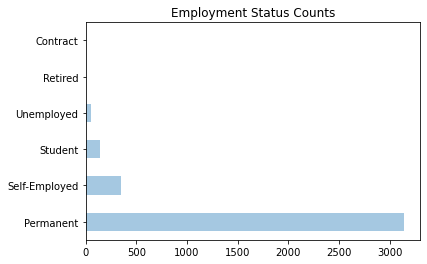

In [18]:
demo_df.employment_status_clients.value_counts().plot(kind='barh', title='Employment Status Counts', alpha=0.4)
plt.show()

#### The above plots shows the employment status counts of customers
* Majority of the customers that are permanently employed hence they qualify for loans since they have a guaranteed source of income.
* Self employed, Students and Unemployed groups have smaller numbers which could mean alot of have no source of income as a result few of them qualify for loans.
* The Retired and Contract group have the least number if any since some of them might be too old to get a loan.

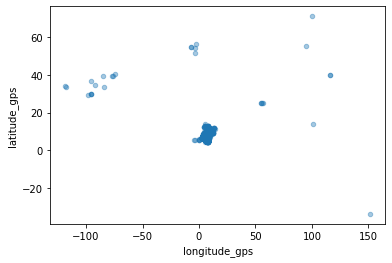

In [19]:
demo_df.plot(kind="scatter", x="longitude_gps", y="latitude_gps", alpha=0.4)
plt.show()

 The above plot shows us that customers are clustered into certain areas, majority of which are in one area.
 Assuming that these are also majority in the group that qualifies for loans, young and permanently employed, we may assum that they are closer to the bank that we assumed to be population on our previous visualisation.
 
 * This can indicate a great potential for people not defaulting in loans at certain areas because of their age groups, employement status and location.
 * More young people qualify for loans
 * Most people that are permanently employed are highly likely to qualify for loans and not default on payments.

In [666]:
train_perf_df = train_perf_df.drop(['approveddate','creationdate'],1)

### Categorical Variable Encoding
Here we will encode all variables from categorical variables to numerical values

In [667]:
# Function that takes and dataframe and categorical feature name to be encoded and returns encoded dataframe
def feat_encode(df, col_name):
    # Get unique categories from column
    keys = list(df[col_name].unique())
    # Get index for each unique category to be encoded value
    values = [val for val in range(len(keys))]
    # Create dictionary of the above keys and values
    encode_dict = dict(zip(keys,values))
    # Alter dataframe entries by swapping each category name with values
    df[col_name] = df[col_name].apply(lambda x: encode_dict[x])
    # Return altered dataframe
    return df

In [668]:
# Encode good_bad_flag to numerical Values
train_perf_df = feat_encode(train_perf_df,'good_bad_flag')
train_perf_df.head()

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,34500.0,30,0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,15000.0,17250.0,30,0
2,8a8588f35438fe12015444567666018e,301966580,7,20000.0,22250.0,15,0
3,8a85890754145ace015429211b513e16,301999343,3,10000.0,11500.0,15,0
4,8a858970548359cc0154883481981866,301962360,9,40000.0,44000.0,30,0


In [669]:
# Encode all categorical data from dataset
demo_df = feat_encode(demo_df,'employment_status_clients')
demo_df = feat_encode(demo_df,'bank_name_clients')
demo_df = feat_encode(demo_df,'bank_account_type')
demo_df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients
0,8a858e135cb22031015cbafc76964ebd,1973,0,3.319219,6.528604,0,0
1,8a858e275c7ea5ec015c82482d7c3996,1986,0,3.325598,7.119403,1,1
2,8a858e5b5bd99460015bdc95cd485634,1987,0,5.746100,5.563174,2,0
3,8a858efd5ca70688015cabd1f1e94b55,1991,0,3.362850,6.642485,0,1
4,8a858e785acd3412015acd48f4920d04,1982,0,8.455332,11.971410,0,1


### Get test data that will be used to evaluate our test models

In [670]:
test_perf_df = pd.read_csv('data/testperf.csv')
test_perf_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN


In [671]:
# Drop columns to match our train data
test_perf_df = test_perf_df.drop(['approveddate','creationdate','referredby'],1)
test_perf_df.head()

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays
0,8a858899538ddb8e015390510b321f08,301998974,4,10000,12250.0,30
1,8a858959537a097401537a4e316e25f7,301963615,10,40000,44000.0,30
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,20000,24500.0,30
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,30000,34500.0,30
4,8a858e225a28c713015a30db5c48383d,301959177,4,20000,24500.0,30


In [672]:
test_perf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerid    1450 non-null   object 
 1   systemloanid  1450 non-null   int64  
 2   loannumber    1450 non-null   int64  
 3   loanamount    1450 non-null   int64  
 4   totaldue      1450 non-null   float64
 5   termdays      1450 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 68.1+ KB


## Variable Selection and Preprocessing

In [673]:
train_perf_df.corr()

,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag
systemloanid,1.000000,-0.046542,-0.057324,-0.061628,-0.065113,-0.007048
loannumber,-0.046542,1.000000,0.833318,0.815303,0.405131,-0.090487
loanamount,-0.057324,0.833318,1.000000,0.994392,0.558818,-0.115267
totaldue,-0.061628,0.815303,0.994392,1.000000,0.627599,-0.108357
termdays,-0.065113,0.405131,0.558818,0.627599,1.000000,-0.005160
good_bad_flag,-0.007048,-0.090487,-0.115267,-0.108357,-0.005160,1.000000


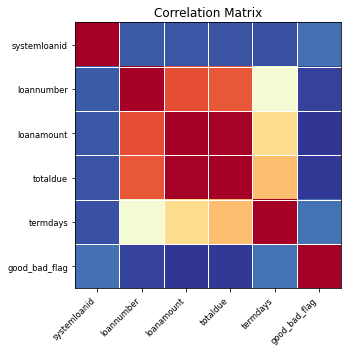

In [674]:
from statsmodels.graphics.correlation import plot_corr
fig = plt.figure(figsize=(5,5));
ax = fig.add_subplot(111);
plot_corr(train_perf_df.corr(), xnames = train_perf_df.corr().columns, ax = ax);

* The above correlation matrix shows that there is a perfect positive correlation between loan amount and total due, as a result we have to drop one of them to avoid multicolinearity.
* Assuming that the loan number describes the total number of loans taken by a customer, we notice there is a high positive correlation between the loan number and amount due. In which case taking more loans does increase the amount a customer has to pay back, as a result we will drop the loan number.
* Therefore we will use total due and term days to classify our data.

In [675]:
def data_preprocess(df):
    le = LabelEncoder()
    for col in df:
        if df[col].dtypes== 'object':
            df[col]=le.fit_transform(df[col])
    X = df[['totaldue','termdays']]
    y = df.good_bad_flag
    scaler = MinMaxScaler(feature_range=(0, 1))
    rescaledX = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(rescaledX,
                                y,
                                test_size=0.2,
                                random_state=42)
    return (X_train, y_train), (X_test, y_test)

In [676]:
(X_train, y_train), (X_test, y_test) = data_preprocess(train_perf_df)
print(X_train[:1])
print(y_train[:1])
print(X_test[:1])
print(y_test[:1])

[[0.04302926 0.2       ]]
2406    0
Name: good_bad_flag, dtype: int64
[[0.22375215 0.2       ]]
1374    0
Name: good_bad_flag, dtype: int64


In [677]:
rescaled_test

array([[0.79615933, 0.4       , 0.42168675, 0.2       ],
       [0.14745967, 0.        , 0.12478485, 0.2       ],
       [0.17765829, 0.2       , 0.21084337, 0.        ],
       ...,
       [0.81402392, 0.04      , 0.02581756, 0.        ],
       [0.42124438, 0.        , 0.05163511, 0.2       ],
       [0.18959728, 0.24      , 0.42168675, 0.2       ]])

In [678]:
def train_model(X_train, y_train):
    lm = LogisticRegression()
    lm.fit(X_train,y_train)
    return lm

# Testing Our Models

## Models to Evaluate

### We will compare five different machine learning Cassification models using Cross Validation Scores:

* Logistic Regression
* Naive Bayes
* Random Forest Classification
* Gradient Boost Classification?

In [687]:
# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    return accuracies.mean()

In [688]:
# Function to calculate predictions
def get_predicitons(model, X_test):
    # Make predictions using selected model
    model_pred = model.predict(X_test)
    # Return model predictions
    return model_pred

In [689]:
# Takes in a model, trains the model, and evaluates the model on the test set
def evaluate(model):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions and evalute
    model_cross = cross_val(X_train, y_train, model)
    # Return the performance metric
    return model_cross

In [690]:
# Classification Models used to classify the data
lm = LogisticRegression(solver='lbfgs')
naive = GaussianNB()
random = RandomForestClassifier(n_estimators = 42, criterion = 'entropy')
gb = XGBClassifier()

In [691]:
print('Logistic Regression Cross Validation Score: ', evaluate(lm))
print('Naive Bayes Cross Validation Score: ', evaluate(naive))
print('Random Forest Cross Validation Score: ', evaluate(random))
print('Gradient Boosting Classification Cross Validation Score: ', evaluate(gb))

Logistic Regression Cross Validation Score:  0.7864920180106425
Naive Bayes Cross Validation Score:  0.7864920180106425
Random Forest Cross Validation Score:  0.7856324191567744
Gradient Boosting Classification Cross Validation Score:  0.7864920180106425


From the above algorithms we notice that Naive Bayes and Gradient Boost Classification have the highest performance compared to Randomforests and Logistic Regression

# Insights and Conclusion

From our analysis it is highly recommended that the client should loans loans to young, permanently employed customers that live in the city

To improve prediction results, data that includes customer assets, debt review information, persons health and the number of family members would highly improved the predictions as this kind of information has a huge impact on personal finances. As a result making it easier to determine whether offering an indiviual a loan would be a good or bad risk.

 For more improvements on this assessment more indepth analysis on the datasests on things and visualisations on customer performance based on demographics and previous loan informations would definetly help in making more informed and accurate recommendations to a client and also improve model predictions.

If there was more time I would do a more indepth Exploratory Data Analysis with the provided datasets to grain more useful insights.
I would also improve feature selection and to improve model accuracy. Then in the future deploy highly accurate models to help simplify work for the client in determining who to offer a loan.